In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import matplotlib

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
f_root = TFile("Files/SelectionII_ccpi0_dQdx_v7.root") 
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC $\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['All','Cosmic','CC1pi0','CC0pi0','NC1pi0','NC0pi0','Other']
color_v = ['blue','purple','yellow','lime','green','lightskyblue','salmon'] 


In [3]:

import pandas as pd

f = rn.root2array('Files/SelectionII_ccpi0_dQdx_v7.root',treename='tree')
df = pd.DataFrame(f)

#df_all = df.query('sample == 2')
#df_some = df.query('mult == 1 & bkgd_id ==1 & sample == 2')
#df_temp = df.query('mult > 1 & bkgd_id ==1 & sample == 2')
#_,_,_= plt.hist(df_all.flash_npe.values,bins=50,range=(0,120))
#print df_all.shape[0], df_some.shape[0], df_temp.shape[0]

f = rn.root2array('Files/SelectionII_ccpi0_dQdx_v7.root',treename='flash_tree')
df_fl = pd.DataFrame(f)

cut = 40

df_fl_0 = df_fl.query('sample == 0')
df_fl_1 = df_fl.query('sample == 1')
df_fl_2 = df_fl.query('sample == 2')

df_fl_pe0 = df_fl.query('sample == 0 & flash_npe_ft > %i'%cut)
df_fl_pe1 = df_fl.query('sample == 1 & flash_npe_ft > %i'%cut)
df_fl_pe2 = df_fl.query('sample == 2 & flash_npe_ft > %i'%cut)

print df_fl_pe0.shape, df_fl_0.shape
print df_fl_pe0.flash_npe_ft.values

#print df_fl.shape
#_,_,_, =plt.hist(df_fl.flash_npe_ft.values,bins = 50)#,range=(0,10))


(448106, 3) (452420, 3)
[ 353  368  245 ...,  980 7001 1580]


In [4]:
print df_fl_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452420 entries, 0 to 452419
Data columns (total 3 columns):
sample          452420 non-null int32
flash_t_ft      452420 non-null float32
flash_npe_ft    452420 non-null int32
dtypes: float32(1), int32(2)
memory usage: 8.6 MB
None


(0.5, 1)

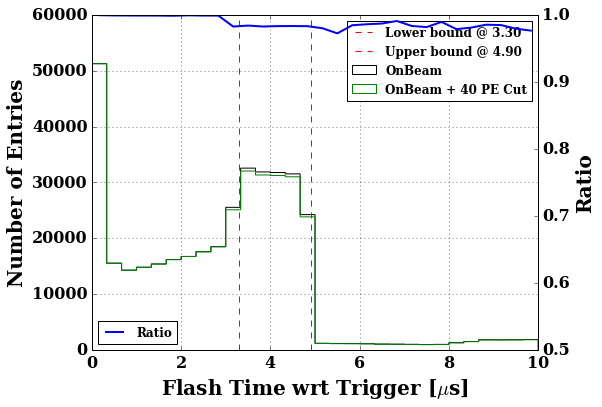

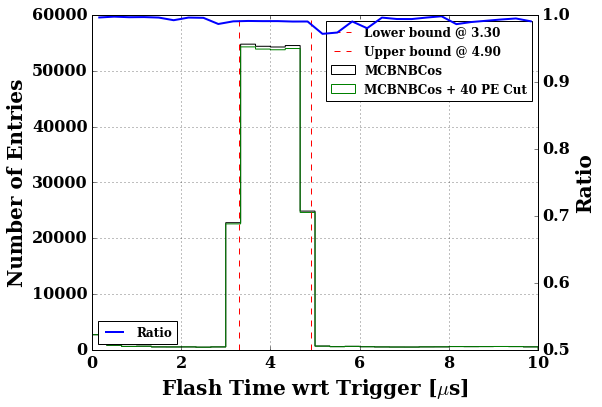

In [57]:
xmin = 3.3 #155 #3.3
xmax = 4.9 #755 #4.9
n = 30

fig, ax = plt.subplots(figsize=(8,6))
n0,bins0,_ = plt.hist(df_fl_0.flash_t_ft.values,bins=n,label='OnBeam',histtype='step',lw=1,color='k',range=(0,10))
n1,bins1,_ = plt.hist(df_fl_pe0.flash_t_ft.values,bins=n,label='OnBeam + %i PE Cut'%cut,histtype='step',lw=1,color='g',range=(0,10))

plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
#plt.yscale('log')
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.2f' % xmax)
plt.legend() #loc=0) #loc='center left', bbox_to_anchor=(.53,0.5))


ax2 = ax.twinx()
ratio = n1/n0
edges = 0.5 * (bins0[:-1] + bins0[1:])
p = ax2.plot(edges,ratio,'b-',lw=2,label='Ratio')
ax2.set_ylabel('Ratio',fontsize=20,weight='bold')
ax2.legend(handles=p,loc=3) #loc=0) #loc='center left', bbox_to_anchor=(.53,0.5))
ax2.set_ylim(0.5,1)

fig, ax = plt.subplots(figsize=(8,6))
n0,bins0,_ = plt.hist(df_fl_2.flash_t_ft.values,bins=n,label='MCBNBCos',histtype='step',lw=1,color='k',range=(0,10))
n1,bins1,_ = plt.hist(df_fl_pe2.flash_t_ft.values,bins=n,label='MCBNBCos + %i PE Cut'%cut,histtype='step',lw=1,color='g',range=(0,10))

plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
#plt.yscale('log')
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.2f' % xmax)
plt.legend() #loc=0) #loc='center left', bbox_to_anchor=(.53,0.5))


ax2 = ax.twinx()
ratio = n1/n0
edges = 0.5 * (bins0[:-1] + bins0[1:])
p = ax2.plot(edges,ratio,'b-',lw=2,label='Ratio')
ax2.set_ylabel('Ratio',fontsize=20,weight='bold')
ax2.legend(handles=p,loc=3) #loc=0) #loc='center left', bbox_to_anchor=(.53,0.5))
ax2.set_ylim(0.5,1)

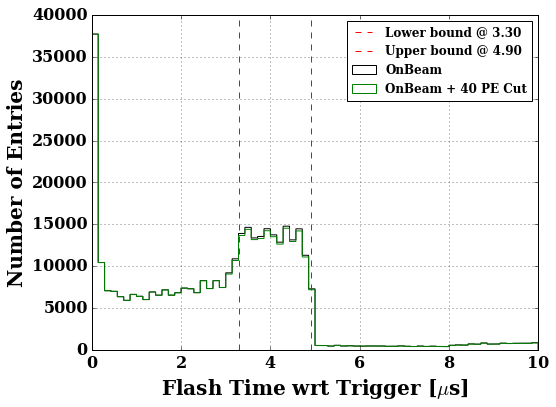

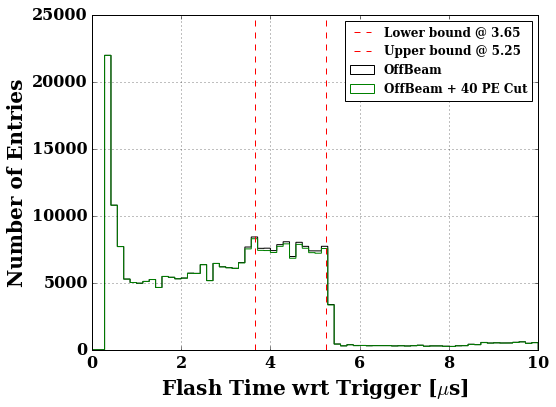

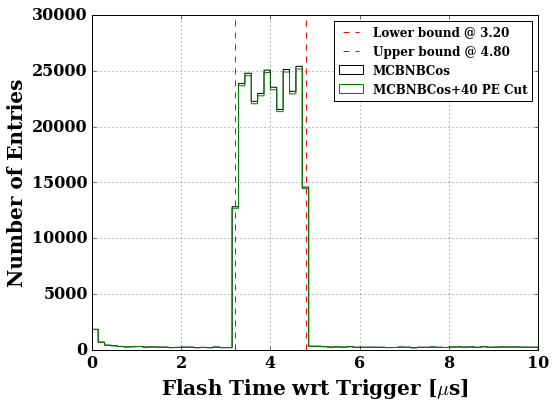

In [7]:
xmin = 3.3 #155 #3.3
xmax = 4.9 #755 #4.9

plt.figure(figsize=(8,6))
plt.hist(df_fl_0.flash_t_ft.values,bins=70,label='OnBeam',histtype='step',lw=1,color='k',range=(0,10))
plt.hist(df_fl_pe0.flash_t_ft.values,bins=70,label='OnBeam + %i PE Cut'%cut,histtype='step',lw=1,color='g',range=(0,10))
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
#plt.yscale('log')
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.2f' % xmax)
plt.legend(loc=0) #loc='center left', bbox_to_anchor=(.53,0.5))

#handles,labels = ax.get_legend_handles_labels()
lgd = plt.legend()#handles=handles,fontsize=14)#,loc='upper left',bbox_to_anchor=(0.34,0.8))

plt.savefig('Plots/CutJustify_sel2_OnBeam_beamwindow.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

xmin = 3.65 #155 #3.3
xmax = 5.25 #755 #4.9

plt.figure(figsize=(8,6))
plt.hist(df_fl_1.flash_t_ft.values,bins=70,label='OffBeam',histtype='step',lw=1,color='k',range=(0,10))
plt.hist(df_fl_pe1.flash_t_ft.values,bins=70,label='OffBeam + %i PE Cut'%cut,histtype='step',lw=1,color='g',range=(0,10))
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
#plt.yscale('log')
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.2f' % xmax)
plt.legend(loc=0) #loc='center left', bbox_to_anchor=(.53,0.5))
#handles,labels = ax.get_legend_handles_labels()
lgd = plt.legend()#handles=handles,fontsize=14)
plt.savefig('Plots/CutJustify_sel2_OffBeam_beamwindow.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

xmin = 3.2 #155 #3.3
xmax = 4.8 #755 #4.9

plt.figure(figsize=(8,6))
plt.hist(df_fl_2.flash_t_ft.values,bins=70,label='MCBNBCos',histtype='step',lw=1,color='k',range=(0,10))
plt.hist(df_fl_pe2.flash_t_ft.values,bins=70,label='MCBNBCos+%i PE Cut'%cut,histtype='step',lw=1,color='g',range=(0,10))
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
#plt.yscale('log')
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.2f' % xmax)
plt.legend(loc=0) #loc='center left', bbox_to_anchor=(.53,0.5))
#handles,labels = ax.get_legend_handles_labels()
lgd = plt.legend(fontsize=12)
plt.savefig('Plots/CutJustify_sel2_MCBNBCos_beamwindow.png',bbox_extra_artists=(lgd,), bbox_inches='tight')


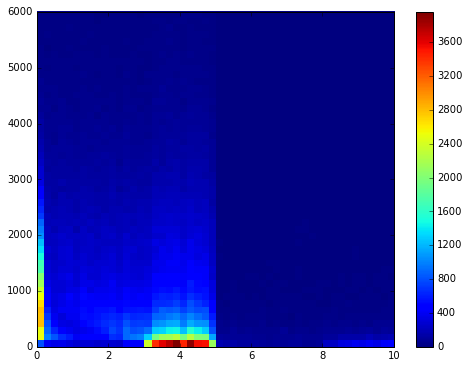

In [16]:
plt.figure(figsize=(8,6))
_ =plt.hist2d(df_fl_0.flash_t_ft.values,df_fl_0.flash_npe_ft,bins=(50,50),range=((0,10),(0,6000)))
plt.colorbar()